In [ ]:
import pandas as pd

data = pd.read_csv("서울생활물류.csv", encoding='euc-kr')
data['송하인_시명'] = data['송하인_시명'].replace('강원특별자치도', '강원도')
data


,배송년월일,송하인_시명,송하인_시코드,송하인_시 인구수,수하인_시명,수하인_시코드,수하인_구명,수하인_구 인구수,수하인_구코드,대분류_착지물동량 가구/인테리어,대분류_착지물동량 기타,대분류_착지물동량 도서/음반,대분류_착지물동량 디지털/가전,대분류_착지물동량 생활/건강,대분류_착지물동량 스포츠/레저,대분류_착지물동량 식품,대분류_착지물동량 출산/육아,대분류_착지물동량 패션의류,대분류_착지물동량 패션잡화,대분류_착지물동량 화장품/미용
0,20231231,강원도,51,NaN,서울특별시,11,은평구,NaN,11380,0,0,0,0,0,0,0,0,0,0,0
1,20231231,강원도,51,NaN,서울특별시,11,성동구,NaN,11200,0,0,0,0,0,0,0,0,0,0,0
2,20231231,제주특별자치도,50,NaN,서울특별시,11,강동구,NaN,11740,0,0,0,0,0,0,16,0,0,0,0
3,20231231,제주특별자치도,50,NaN,서울특별시,11,송파구,NaN,11710,0,0,0,0,0,0,25,0,0,0,0
4,20231231,제주특별자치도,50,NaN,서울특별시,11,강남구,NaN,11680,0,0,0,0,0,0,43,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906547,20180101,서울특별시,11,NaN,서울특별시,11,광진구,NaN,11215,15,22,18,3,66,9,19,6,37,37,5
906548,20180101,서울특별시,11,NaN,서울특별시,11,성동구,NaN,11200,11,12,17,3,54,4,14,4,21,26,5
906549,20180101,서울특별시,11,NaN,서울특별시,11,용산구,NaN,11170,30,13,12,11,47,3,22,4,28,29,6
906550,20180101,서울특별시,11,NaN,서울특별시,11,중구,NaN,11140,6,10,5,3,39,4,9,0,18,101,3


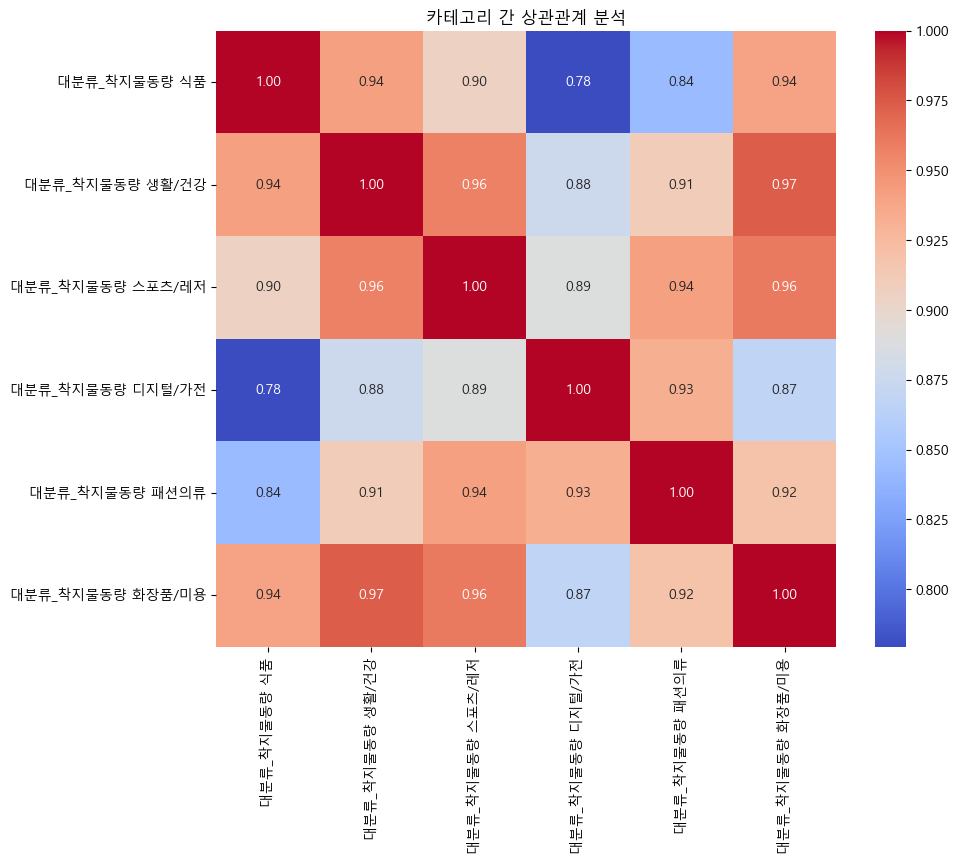

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# 필요한 열 선택
correlation_data = data[['대분류_착지물동량 식품', '대분류_착지물동량 생활/건강', '대분류_착지물동량 스포츠/레저', 
                         '대분류_착지물동량 디지털/가전', '대분류_착지물동량 패션의류', '대분류_착지물동량 화장품/미용']]

# 상관 계수 계산 (피어슨)
correlation_matrix = correlation_data.corr(method='pearson')
plt.rc('font', family='Malgun Gothic')
# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("카테고리 간 상관관계 분석")
plt.show()


# 인구수 데이터 추가

https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1B040A3&vw_cd=MT_ZTITLE&list_id=A_7&scrId=&seqNo=&lang_mode=ko&obj_var_id=&itm_id=&conn_path=MT_ZTITLE&path=%252FstatisticsList%252FstatisticsListIndex.do


In [4]:
total_population = pd.read_excel('데이터셋/행정구역_인구수.xlsx')
seoul_population = pd.read_excel('데이터셋/서울시_인구수.xlsx')

In [6]:
# 1. '배송년월일'에서 '년월'을 추출
data['배송년월'] = data['배송년월일'].astype(str).str[:6]

# 2. 열 이름 변경
total_population_long = total_population.melt(
    id_vars=['행정구역(시군구)별'],
    var_name='년도월',
    value_name='인구수'
)
total_population_long.rename(columns={'행정구역(시군구)별': '송하인_시명', '년도월': '배송년월'}, inplace=True)
total_population_long.columns = [
    col.replace('.', '') if col.replace('.', '').isdigit() else col
    for col in total_population_long.columns
]
total_population_long


,송하인_시명,배송년월,인구수
0,전국,2018.01,51779148
1,서울특별시,2018.01,9851767
2,부산광역시,2018.01,3467055
3,대구광역시,2018.01,2474309
4,인천광역시,2018.01,2950771
...,...,...,...
1291,전라북도,2023.12,1754757
1292,전라남도,2023.12,1804217
1293,경상북도,2023.12,2554324
1294,경상남도,2023.12,3251158


In [ ]:
seoul_population_long = seoul_population.melt(
    id_vars=['행정구역(시군구)별'],
    var_name='년도월',
    value_name='인구수'
)
seoul_population_long.rename(columns={'행정구역(시군구)별': '수하인_구명', '년도월': '배송년월'}, inplace=True)
seoul_population_long.columns = [
    col.replace('.', '') if col.replace('.', '').isdigit() else col
    for col in seoul_population_long.columns
]
seoul_population_long


,수하인_구명,배송년월,인구수
0,서울특별시,2018.01,9851767
1,종로구,2018.01,154619
2,중구,2018.01,125786
3,용산구,2018.01,229541
4,성동구,2018.01,304955
...,...,...,...
1867,관악구,2023.12,481956
1868,서초구,2023.12,407664
1869,강남구,2023.12,544873
1870,송파구,2023.12,654166


In [ ]:
def clean_year_month_column(series):
    return series.apply(lambda x: x.replace('.', '') if isinstance(x, str) and x.replace('.', '').isdigit() else x)

total_population_long['배송년월'] = clean_year_month_column(total_population_long['배송년월'])
seoul_population_long['배송년월'] = clean_year_month_column(seoul_population_long['배송년월'])
seoul_population_long

,수하인_구명,배송년월,인구수
0,서울특별시,201801,9851767
1,종로구,201801,154619
2,중구,201801,125786
3,용산구,201801,229541
4,성동구,201801,304955
...,...,...,...
1867,관악구,202312,481956
1868,서초구,202312,407664
1869,강남구,202312,544873
1870,송파구,202312,654166


In [ ]:
# 1. '배송년월일'에서 '년월'을 추출
data['배송년월'] = data['배송년월일'].astype(str).str[:6]

# 2. 데이터 타입 맞춰주기
data['송하인_시명'] = data['송하인_시명'].astype(str)
data['수하인_구명'] = data['수하인_구명'].astype(str)
data['배송년월'] = data['배송년월'].astype(str)

total_population_long['송하인_시명'] = total_population_long['송하인_시명'].astype(str)
total_population_long['배송년월'] = total_population_long['배송년월'].astype(str)

seoul_population_long['수하인_구명'] = seoul_population_long['수하인_구명'].astype(str)
seoul_population_long['배송년월'] = seoul_population_long['배송년월'].astype(str)

print(total_population_long)
print(seoul_population_long)

       송하인_시명    배송년월       인구수
0          전국  201801  51779148
1       서울특별시  201801   9851767
2       부산광역시  201801   3467055
3       대구광역시  201801   2474309
4       인천광역시  201801   2950771
...       ...     ...       ...
1291     전라북도  202312   1754757
1292     전라남도  202312   1804217
1293     경상북도  202312   2554324
1294     경상남도  202312   3251158
1295  제주특별자치도  202312    675252

[1296 rows x 3 columns]
     수하인_구명    배송년월      인구수
0     서울특별시  201801  9851767
1       종로구  201801   154619
2        중구  201801   125786
3       용산구  201801   229541
4       성동구  201801   304955
...     ...     ...      ...
1867    관악구  202312   481956
1868    서초구  202312   407664
1869    강남구  202312   544873
1870    송파구  202312   654166
1871    강동구  202312   459167

[1872 rows x 3 columns]


In [ ]:
# 3. .merge() 이용해서 맞는 위치에 데이터 추가하기
data = data.merge(
    total_population_long,
    on=['송하인_시명', '배송년월'],
    how='left'
)
# Step 4: '송하인_시 인구수'로 열 이름 바꾸기
data['송하인_시 인구수'] = data['인구수']
data.drop(columns=['인구수'], inplace=True)


In [ ]:
# 3. .merge() 이용해서 맞는 위치에 데이터 추가하기
data = data.merge(
    seoul_population_long,
    on=['수하인_구명', '배송년월'],
    how='left'
)
# Step 4: '수하인_시 인구수'로 열 이름 바꾸기
data['수하인_구 인구수'] = data['인구수']
data.drop(columns=['인구수'], inplace=True)

data.head()

,배송년월일,송하인_시명,송하인_시코드,송하인_시 인구수,수하인_시명,수하인_시코드,수하인_구명,수하인_구 인구수,수하인_구코드,대분류_착지물동량 가구/인테리어,...,대분류_착지물동량 도서/음반,대분류_착지물동량 디지털/가전,대분류_착지물동량 생활/건강,대분류_착지물동량 스포츠/레저,대분류_착지물동량 식품,대분류_착지물동량 출산/육아,대분류_착지물동량 패션의류,대분류_착지물동량 패션잡화,대분류_착지물동량 화장품/미용,배송년월
0,20231231,강원도,51,1527807,서울특별시,11,은평구,466770,11380,0,...,0,0,0,0,0,0,0,0,0,202312
1,20231231,강원도,51,1527807,서울특별시,11,성동구,277361,11200,0,...,0,0,0,0,0,0,0,0,0,202312
2,20231231,제주특별자치도,50,675252,서울특별시,11,강동구,459167,11740,0,...,0,0,0,0,16,0,0,0,0,202312
3,20231231,제주특별자치도,50,675252,서울특별시,11,송파구,654166,11710,0,...,0,0,0,0,25,0,0,0,0,202312
4,20231231,제주특별자치도,50,675252,서울특별시,11,강남구,544873,11680,0,...,0,0,0,0,43,0,0,0,0,202312


In [ ]:
data.columns = data.columns.str.replace('대분류_착지물동량 ', '', regex=False)
data

,배송년월일,송하인_시명,송하인_시코드,송하인_시 인구수,수하인_시명,수하인_시코드,수하인_구명,수하인_구 인구수,수하인_구코드,가구/인테리어,...,도서/음반,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,배송년월
0,20231231,강원도,51,1527807,서울특별시,11,은평구,466770,11380,0,...,0,0,0,0,0,0,0,0,0,202312
1,20231231,강원도,51,1527807,서울특별시,11,성동구,277361,11200,0,...,0,0,0,0,0,0,0,0,0,202312
2,20231231,제주특별자치도,50,675252,서울특별시,11,강동구,459167,11740,0,...,0,0,0,0,16,0,0,0,0,202312
3,20231231,제주특별자치도,50,675252,서울특별시,11,송파구,654166,11710,0,...,0,0,0,0,25,0,0,0,0,202312
4,20231231,제주특별자치도,50,675252,서울특별시,11,강남구,544873,11680,0,...,0,0,0,0,43,0,0,0,0,202312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906547,20180101,서울특별시,11,9851767,서울특별시,11,광진구,357785,11215,15,...,18,3,66,9,19,6,37,37,5,201801
906548,20180101,서울특별시,11,9851767,서울특별시,11,성동구,304955,11200,11,...,17,3,54,4,14,4,21,26,5,201801
906549,20180101,서울특별시,11,9851767,서울특별시,11,용산구,229541,11170,30,...,12,11,47,3,22,4,28,29,6,201801
906550,20180101,서울특별시,11,9851767,서울특별시,11,중구,125786,11140,6,...,5,3,39,4,9,0,18,101,3,201801


# 총 소득 데이터 추가

https://data.seoul.go.kr/dataList/OA-22167/S/1/datasetView.do

In [ ]:
import pandas as pd

data = pd.read_csv("added_data.csv")
income = pd.read_csv("서울시 소득소비-자치구.csv", encoding='euc-kr')

In [ ]:
# 분기로 변환하는 함수 정의
def convert_to_quarter(year_month):
    year = year_month // 100  # 연도 추출
    month = year_month % 100  # 월 추출
    quarter = (month - 1) // 3 + 1  # 분기 계산
    return f"{year}{quarter}"  # 연도와 분기 형식으로 반환

# 배송년월 열 변환
data['기준_년분기_코드'] = data['배송년월'].apply(convert_to_quarter)
data

,Unnamed: 0,배송년월일,송하인_시명,송하인_시코드,송하인_시 인구수,수하인_시명,수하인_시코드,수하인_구명,수하인_구 인구수,수하인_구코드,...,디지털/가전,생활/건강,스포츠/레저,식품,출산/육아,패션의류,패션잡화,화장품/미용,배송년월,기준_년분기_코드
0,0,20231231,강원도,51,1527807,서울특별시,11,은평구,466770,11380,...,0,0,0,0,0,0,0,0,202312,20234
1,1,20231231,강원도,51,1527807,서울특별시,11,성동구,277361,11200,...,0,0,0,0,0,0,0,0,202312,20234
2,2,20231231,제주특별자치도,50,675252,서울특별시,11,강동구,459167,11740,...,0,0,0,16,0,0,0,0,202312,20234
3,3,20231231,제주특별자치도,50,675252,서울특별시,11,송파구,654166,11710,...,0,0,0,25,0,0,0,0,202312,20234
4,4,20231231,제주특별자치도,50,675252,서울특별시,11,강남구,544873,11680,...,0,0,0,43,0,0,0,0,202312,20234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906547,906547,20180101,서울특별시,11,9851767,서울특별시,11,광진구,357785,11215,...,3,66,9,19,6,37,37,5,201801,20181
906548,906548,20180101,서울특별시,11,9851767,서울특별시,11,성동구,304955,11200,...,3,54,4,14,4,21,26,5,201801,20181
906549,906549,20180101,서울특별시,11,9851767,서울특별시,11,용산구,229541,11170,...,11,47,3,22,4,28,29,6,201801,20181
906550,906550,20180101,서울특별시,11,9851767,서울특별시,11,중구,125786,11140,...,3,39,4,9,0,18,101,3,201801,20181


In [ ]:
income.columns
# 원하는 열만 선택해서 새로운 데이터프레임 생성
income = income[['기준_년분기_코드', '행정동_코드_명', '월_평균_소득_금액', '지출_총금액', '식료품_지출_총금액', '음식_지출_총금액']]
# '행정동_코드_명' 열 이름을 '수하인_구명'으로 변경
income.rename(columns={'행정동_코드_명': '수하인_구명'}, inplace=True)
income

,기준_년분기_코드,수하인_구명,월_평균_소득_금액,지출_총금액,식료품_지출_총금액,음식_지출_총금액
0,20234,중랑구,2598785,6.737388e+10,1.974204e+10,17188015000
1,20234,양천구,3796034,1.077700e+11,2.724981e+10,20585978000
2,20234,도봉구,2785111,5.124486e+10,1.608475e+10,12804562000
3,20234,은평구,2912739,8.994061e+10,2.171419e+10,21724669000
4,20234,구로구,2994059,1.492340e+12,2.608339e+10,22237521000
...,...,...,...,...,...,...
495,20191,성동구,3833236,6.025455e+10,1.350882e+10,16656562000
496,20191,중랑구,2701482,5.439755e+10,1.672902e+10,12412549000
497,20191,영등포구,3757774,1.535560e+11,1.983282e+10,33245687000
498,20191,강남구,5126808,1.711420e+12,3.549968e+10,75265681000


In [ ]:
income['수하인_구명'] = income['수하인_구명'].astype(str)
income['기준_년분기_코드'] = income['기준_년분기_코드'].astype(str)

data = data.merge(
    income,
    on=['수하인_구명', '기준_년분기_코드'],
    how='left'
)
data

,Unnamed: 0,배송년월일,송하인_시명,송하인_시코드,송하인_시 인구수,수하인_시명,수하인_시코드,수하인_구명,수하인_구 인구수,수하인_구코드,...,출산/육아,패션의류,패션잡화,화장품/미용,배송년월,기준_년분기_코드,월_평균_소득_금액,지출_총금액,식료품_지출_총금액,음식_지출_총금액
0,0,20231231,강원도,51,1527807,서울특별시,11,은평구,466770,11380,...,0,0,0,0,202312,20234,2912739.0,8.994061e+10,2.171419e+10,2.172467e+10
1,1,20231231,강원도,51,1527807,서울특별시,11,성동구,277361,11200,...,0,0,0,0,202312,20234,3734499.0,8.824870e+10,2.147872e+10,2.681916e+10
2,2,20231231,제주특별자치도,50,675252,서울특별시,11,강동구,459167,11740,...,0,0,0,0,202312,20234,3292857.0,1.575440e+11,2.369688e+10,2.432302e+10
3,3,20231231,제주특별자치도,50,675252,서울특별시,11,송파구,654166,11710,...,0,0,0,0,202312,20234,3995905.0,2.175220e+11,4.037160e+10,4.919776e+10
4,4,20231231,제주특별자치도,50,675252,서울특별시,11,강남구,544873,11680,...,0,0,0,0,202312,20234,4943841.0,2.765960e+12,4.322705e+10,8.755149e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906547,906547,20180101,서울특별시,11,9851767,서울특별시,11,광진구,357785,11215,...,6,37,37,5,201801,20181,NaN,NaN,NaN,NaN
906548,906548,20180101,서울특별시,11,9851767,서울특별시,11,성동구,304955,11200,...,4,21,26,5,201801,20181,NaN,NaN,NaN,NaN
906549,906549,20180101,서울특별시,11,9851767,서울특별시,11,용산구,229541,11170,...,4,28,29,6,201801,20181,NaN,NaN,NaN,NaN
906550,906550,20180101,서울특별시,11,9851767,서울특별시,11,중구,125786,11140,...,0,18,101,3,201801,20181,NaN,NaN,NaN,NaN


# 농산물 지수 추가

https://datacenter.hankyung.com/kedi/kapi

In [ ]:
# 농산물 지수 크롤링
import requests

# XHR 요청 URL
url = "https://datacenter.hankyung.com/data/datafile/ext/json/kapiData.json?_=1731914160833"  # 예: "https://example.com/api/data.json"

# 요청 보내기
response = requests.get(url)

# JSON 데이터 확인
if response.status_code == 200:
    chart_data = response.json()  # JSON 데이터를 파싱
    print(chart_data)  # 데이터를 확인하거나 저장
else:
    print("데이터를 가져오지 못했습니다. 상태 코드:", response.status_code)

# 데이터프레임으로 변환
chart_df = pd.DataFrame(chart_data['chartData'], columns=["timestamp", "kapi_index"])
chart_df

SSLError: HTTPSConnectionPool(host='datacenter.hankyung.com', port=443): Max retries exceeded with url: /data/datafile/ext/json/kapiData.json?_=1731914160833 (Caused by SSLError(SSLError(1, '[SSL: DH_KEY_TOO_SMALL] dh key too small (_ssl.c:1006)')))

In [ ]:
# 타임스탬프를 날짜로 변환
chart_df["date"] = pd.to_datetime(chart_df["timestamp"], unit="ms")

chart_df["formatted_date"] = chart_df["date"].dt.strftime('%Y%m%d')

chart_df = chart_df[["formatted_date", "kapi_index"]]

KeyError: 'timestamp'

In [ ]:
chart_df.rename(columns={'formatted_date': '배송년월일'}, inplace=True)
chart_df

C:\Users\user\AppData\Local\Temp\ipykernel_14988\2714793251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chart_df.rename(columns={'formatted_date': '배송년월일'}, inplace=True)


,배송년월일,kapi_index
0,20200831,139.49
1,20200901,146.66
2,20200902,156.71
3,20200903,167.62
4,20200904,164.26
...,...,...
1286,20241111,161.99
1287,20241112,162.66
1288,20241113,163.63
1289,20241114,167.55


In [ ]:
# 베이스 데이터셋에 2024년 데이터가 없기 때문에 필터링
chart_df = chart_df[~chart_df['배송년월일'].str.startswith('2024')]
chart_df

,배송년월일,kapi_index
0,20200831,139.49
1,20200901,146.66
2,20200902,156.71
3,20200903,167.62
4,20200904,164.26
...,...,...
1017,20231225,193.54
1018,20231226,195.82
1019,20231227,197.17
1020,20231228,206.81


In [ ]:
type(chart_df['배송년월일'][0])
type(data['배송년월일'][0])

numpy.int64

In [ ]:
data['배송년월일'] = data['배송년월일'].astype(str)
# chart_df['배송년월일'] = chart_df['배송년월일'].astype(str)

data = data.merge(
    chart_df,
    on=['배송년월일'],
    how='left'
)
pd.options.display.max_columns = 25


,Unnamed: 0,배송년월일,송하인_시명,송하인_시코드,송하인_시 인구수,수하인_시명,수하인_시코드,수하인_구명,수하인_구 인구수,수하인_구코드,가구/인테리어,기타,...,패션의류,패션잡화,화장품/미용,배송년월,기준_년분기_코드,월_평균_소득_금액,지출_총금액,식료품_지출_총금액,음식_지출_총금액,kapi_index_x,kapi_index_y,kapi_index
0,0,20231231,강원도,51,1527807,서울특별시,11,은평구,466770,11380,0,0,...,0,0,0,202312,20234,2912739.0,8.994061e+10,2.171419e+10,2.172467e+10,NaN,NaN,NaN
1,1,20231231,강원도,51,1527807,서울특별시,11,성동구,277361,11200,0,0,...,0,0,0,202312,20234,3734499.0,8.824870e+10,2.147872e+10,2.681916e+10,NaN,NaN,NaN
2,2,20231231,제주특별자치도,50,675252,서울특별시,11,강동구,459167,11740,0,0,...,0,0,0,202312,20234,3292857.0,1.575440e+11,2.369688e+10,2.432302e+10,NaN,NaN,NaN
3,3,20231231,제주특별자치도,50,675252,서울특별시,11,송파구,654166,11710,0,0,...,0,0,0,202312,20234,3995905.0,2.175220e+11,4.037160e+10,4.919776e+10,NaN,NaN,NaN
4,4,20231231,제주특별자치도,50,675252,서울특별시,11,강남구,544873,11680,0,0,...,0,0,0,202312,20234,4943841.0,2.765960e+12,4.322705e+10,8.755149e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906547,906547,20180101,서울특별시,11,9851767,서울특별시,11,광진구,357785,11215,15,22,...,37,37,5,201801,20181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906548,906548,20180101,서울특별시,11,9851767,서울특별시,11,성동구,304955,11200,11,12,...,21,26,5,201801,20181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906549,906549,20180101,서울특별시,11,9851767,서울특별시,11,용산구,229541,11170,30,13,...,28,29,6,201801,20181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906550,906550,20180101,서울특별시,11,9851767,서울특별시,11,중구,125786,11140,6,10,...,18,101,3,201801,20181,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data

,Unnamed: 0,배송년월일,송하인_시명,송하인_시코드,송하인_시 인구수,수하인_시명,수하인_시코드,수하인_구명,수하인_구 인구수,수하인_구코드,가구/인테리어,기타,...,식품,출산/육아,패션의류,패션잡화,화장품/미용,배송년월,기준_년분기_코드,월_평균_소득_금액,지출_총금액,식료품_지출_총금액,음식_지출_총금액,kapi_index
0,0,20231231,강원도,51,1527807,서울특별시,11,은평구,466770,11380,0,0,...,0,0,0,0,0,202312,20234,2912739.0,8.994061e+10,2.171419e+10,2.172467e+10,NaN
1,1,20231231,강원도,51,1527807,서울특별시,11,성동구,277361,11200,0,0,...,0,0,0,0,0,202312,20234,3734499.0,8.824870e+10,2.147872e+10,2.681916e+10,NaN
2,2,20231231,제주특별자치도,50,675252,서울특별시,11,강동구,459167,11740,0,0,...,16,0,0,0,0,202312,20234,3292857.0,1.575440e+11,2.369688e+10,2.432302e+10,NaN
3,3,20231231,제주특별자치도,50,675252,서울특별시,11,송파구,654166,11710,0,0,...,25,0,0,0,0,202312,20234,3995905.0,2.175220e+11,4.037160e+10,4.919776e+10,NaN
4,4,20231231,제주특별자치도,50,675252,서울특별시,11,강남구,544873,11680,0,0,...,43,0,0,0,0,202312,20234,4943841.0,2.765960e+12,4.322705e+10,8.755149e+10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906547,906547,20180101,서울특별시,11,9851767,서울특별시,11,광진구,357785,11215,15,22,...,19,6,37,37,5,201801,20181,NaN,NaN,NaN,NaN,NaN
906548,906548,20180101,서울특별시,11,9851767,서울특별시,11,성동구,304955,11200,11,12,...,14,4,21,26,5,201801,20181,NaN,NaN,NaN,NaN,NaN
906549,906549,20180101,서울특별시,11,9851767,서울특별시,11,용산구,229541,11170,30,13,...,22,4,28,29,6,201801,20181,NaN,NaN,NaN,NaN,NaN
906550,906550,20180101,서울특별시,11,9851767,서울특별시,11,중구,125786,11140,6,10,...,9,0,18,101,3,201801,20181,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 906552 entries, 0 to 906551
Data columns (total 28 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  906552 non-null  int64  
 1   배송년월일       906552 non-null  object 
 2   송하인_시명      906552 non-null  object 
 3   송하인_시코드     906552 non-null  int64  
 4   송하인_시 인구수   906552 non-null  int64  
 5   수하인_시명      906552 non-null  object 
 6   수하인_시코드     906552 non-null  int64  
 7   수하인_구명      906552 non-null  object 
 8   수하인_구 인구수   906552 non-null  int64  
 9   수하인_구코드     906552 non-null  int64  
 10  가구/인테리어     906552 non-null  int64  
 11  기타          906552 non-null  int64  
 12  도서/음반       906552 non-null  int64  
 13  디지털/가전      906552 non-null  int64  
 14  생활/건강       906552 non-null  int64  
 15  스포츠/레저      906552 non-null  int64  
 16  식품          906552 non-null  int64  
 17  출산/육아       906552 non-null  int64  
 18  패션의류        906552 non-null  int64  
 19  패션

In [ ]:
data.to_csv('added_data_v3.csv')